In [22]:
import numpy as np
import seaborn as sns

%matplotlib inline

In [101]:
uncorrelated_normal = np.random.standard_normal(size=(3, 100000))
var_1 = uncorrelated_normal[0, :]
var_2 = uncorrelated_normal[1, :]
var_3 = uncorrelated_normal[2, :]

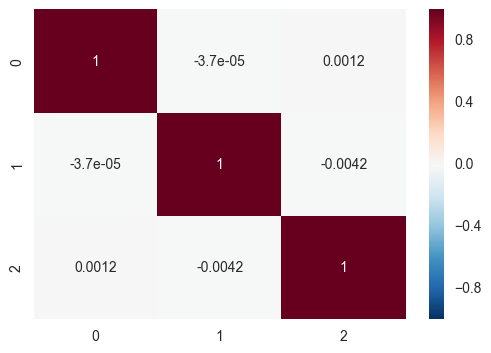

In [102]:
sns.heatmap(np.cov(uncorrelated_normal), annot=True)

Construct desired covariance matrix<br>
Note it's possible the constructed covariance matrix is not positive definte.

In [110]:
corr_12 = 0.05
corr_13 = 0.4
corr_23 = -0.8
desired_cov = np.array([
        [var_1.var(), var_1.std() * var_2.std() * corr_12, var_1.std() * var_3.std() * corr_13],
        [var_1.std() * var_2.std() * corr_12, var_2.var(), var_2.std() * var_3.std() * corr_23],
        [var_1.std() * var_3.std() * corr_13, var_2.std() * var_3.std() * corr_23, var_3.var()]
    ])

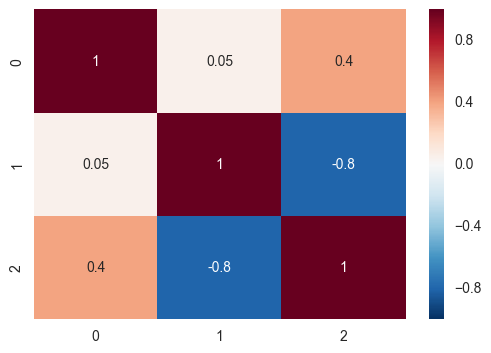

In [111]:
sns.heatmap(desired_cov, annot=True)

### Step 1: eigenvectors and eigenvalues

In [112]:
eigenvalues, eigenvectors = np.linalg.eig(desired_cov)

In [113]:
np.linalg.eig(desired_cov)

(array([ 0.08493216,  1.04139073,  1.87656201]),
 array([[ 0.3397963 , -0.8947792 ,  0.28966992],
        [-0.62874037, -0.44517252, -0.637579  ],
        [-0.69944551, -0.03451982,  0.71385178]]))

### Step 2: Trans matrix

In [114]:
B = eigenvectors @ np.sqrt(np.diag(eigenvalues))

### Step 3: Transformation

In [126]:
Z = B @ uncorrelated_normal

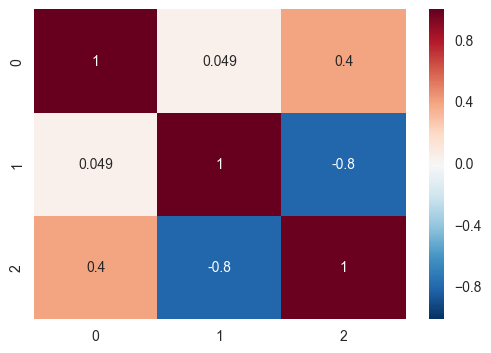

In [127]:
sns.heatmap(np.cov(Z), annot=True)